<a href="https://colab.research.google.com/github/Dineshkumar1823/Global-Terrorism-Analysis/blob/main/Copy_of_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df =  pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone project Global terrorisum/Global Terrorism Data.csv",encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002704e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325955e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [6]:
df.shape

(181691, 135)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [8]:
cols = df.columns
cols

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

To Remove the Column for more than 60% data are NA in this column

In [9]:
thresh = len(df) * .6
df.dropna(thresh = thresh, axis = 1, inplace = True)

In [10]:
df.shape


(181691, 58)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 58 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  float64
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country_txt       181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         181270 non-null  object 
 10  city              181257 non-null  object 
 11  latitude          177135 non-null  float64
 12  longitude         177134 non-null  float64
 13  specificity       181685 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  summary           115562 non-null  object 
 16  crit1             18

In [12]:
null_val =df.isnull().sum()/len(df) *100

In [13]:
null_val.sort_values(axis=0,ascending = False, inplace=True)

In [14]:
null_val[0:1]

nperps    39.140629
dtype: float64

Removing the Duplicates in the Rows

In [15]:
df.drop_duplicates()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1.970000e+11,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,0,0,0,0
1,1.970000e+11,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,7.0,NaN,NaN,13,Unknown,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,1.0,NaN,PGIS,0,1,1,1
2,1.970010e+11,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1
3,1.970010e+11,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
4,1.970010e+11,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,8,Incendiary,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2.017120e+11,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,0.0,1,0,2,Armed Assault,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,182.0,Somalia,Al-Shabaab,0.0,0,-99.0,0.0,1.0,5,Firearms,5.0,Unknown Gun Type,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,0.0,"""Somalia: Al-Shabaab Militants Attack Army Che...",START Primary Collection,0,0,0,0
181687,2.017120e+11,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,0.0,1,0,3,Bombing/Explosion,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,167.0,Russia,Muslim extremists,0.0,0,-99.0,0.0,0.0,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,0.0,"""Putin's 'victory' in Syria has turned into a ...",START Primary Collection,-9,-9,1,1
181688,2.017120e+11,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,0.0,1,0,7,Facility/Infrastructure Attack,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,160.0,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),0.0,0,-99.0,0.0,0

In [16]:
df.shape

(181691, 58)

No Duplicate found


In [17]:
import numpy as np

In [18]:
int_cols=df.select_dtypes(include=np.number).columns.tolist()

In [19]:
int_cols

['eventid',
 'iyear',
 'imonth',
 'iday',
 'extended',
 'country',
 'region',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'targtype1',
 'targsubtype1',
 'natlty1',
 'guncertain1',
 'individual',
 'nperps',
 'nperpcap',
 'claimed',
 'weaptype1',
 'weapsubtype1',
 'nkill',
 'nkillus',
 'nkillter',
 'nwound',
 'nwoundus',
 'nwoundte',
 'property',
 'ishostkid',
 'INT_LOG',
 'INT_IDEO',
 'INT_MISC',
 'INT_ANY']

In [20]:
for i in int_cols:
  df[i] = df[i].fillna(df[i].median())

In [21]:
df.isnull().sum()

eventid                 0
iyear                   0
imonth                  0
iday                    0
extended                0
country                 0
country_txt             0
region                  0
region_txt              0
provstate             421
city                  434
latitude                0
longitude               0
specificity             0
vicinity                0
summary             66129
crit1                   0
crit2                   0
crit3                   0
doubtterr               0
multiple                0
success                 0
suicide                 0
attacktype1             0
attacktype1_txt         0
targtype1               0
targtype1_txt           0
targsubtype1            0
targsubtype1_txt    10373
corp1               42550
target1               636
natlty1                 0
natlty1_txt          1559
gname                   0
guncertain1             0
individual              0
nperps                  0
nperpcap                0
claimed     

In [22]:
string_cols=df.select_dtypes(include=object).columns.tolist()
string_cols

['country_txt',
 'region_txt',
 'provstate',
 'city',
 'summary',
 'attacktype1_txt',
 'targtype1_txt',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1_txt',
 'gname',
 'weaptype1_txt',
 'weapsubtype1_txt',
 'weapdetail',
 'scite1',
 'dbsource']

In [23]:
df=df[['iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'ishostkid','dbsource']] 
       # taking required columns for my analysis

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

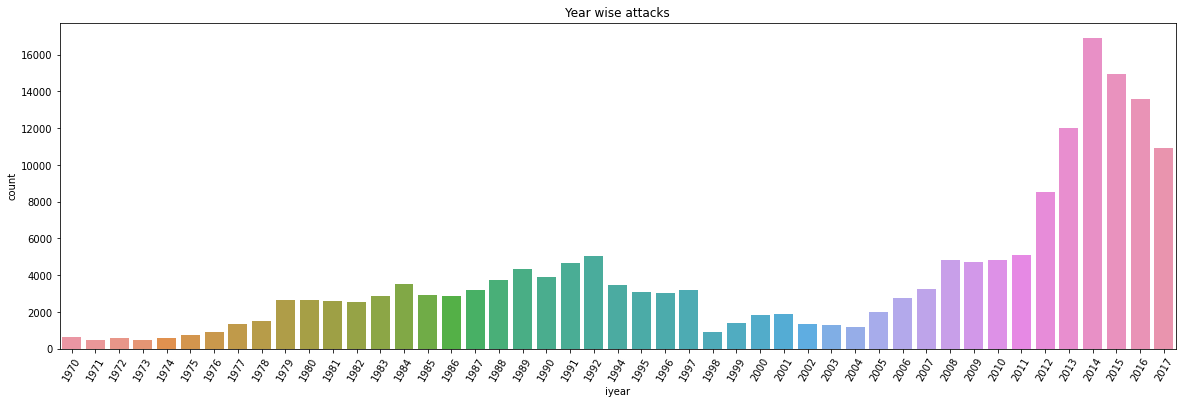

In [25]:
plt.figure(figsize=(20,6))
sns.countplot(df['iyear']).set_title('Year wise attacks')
plt.xticks(rotation=60)

The above plot shows the every year Attack (1970 to 2017)
It clearly Tells the More Numbers of Attack done in 2014

Text(0.5, 1.0, 'Month wise attacks')

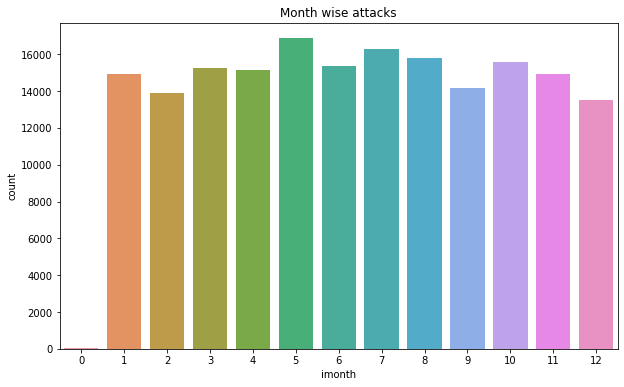

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(df['imonth']).set_title('Month wise attacks')

The above plot shows the 2014 - Month wise Attack , Clearly see May had done more number of Attack

In [27]:
df[df['imonth']==0]

,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,dbsource
1,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,7.0,0.0,0.0,13,Unknown,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,PGIS
1123,1972,0,0,0,160,Philippines,5,Southeast Asia,Capiz,Roxas,11.586558,122.753716,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,6,Airports & Aircraft,42.0,Aircraft (not at an airport),NaN,air manila fokker F-27p,160.0,Philippines,Unknown,0.0,0,-99.0,0.0,0.0,6,Explosives,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,PGIS
1690,1973,0,0,1,45,Colombia,3,South America,Unknown,unknown,31.467463,43.246506,5.0,0,NaN,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),1,Business,9.0,Farm/Ranch,NaN,"Alirio Serrano Sanchez, rancher",45.0,Colombia,National Liberation Army of Colombia (ELN),0.0,0,-99.0,0.0,0.0,13,Unknown,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,PGIS
2164,1974,0,0,0,69,France,8,Western Europe,Paris,Paris,48.856644,2.342330,1.0,0,NaN,1,1,1,-9.0,0.0,0,0,3,Bombing/Explosion,1,Business,3.0,Bank/Commerce,NaN,Bank Lazard,69.0,France,Unknown,0.0,0,-99.0,0.0,0.0,6,Explosives,28.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,PGIS
2165,1974,0,0,0,98,Italy,8,Western Europe,Lazio,Rome,41.890961,12.490069,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,6,Airports & Aircraft,42.0,Aircraft (not at an airport),NaN,TWA Boeing 707,217.0,United States,Unknown,0.0,0,-99.0,0.0,0.0,6,Explosives,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,PGIS
2744,1975,0,0,0,153,Pakistan,6,South Asia,Punjab,Rawalpindi,33.594013,73.069077,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,6,Airports & Aircraft,42.0,Aircraft (not at an airport),NaN,Pakistan Airlines Boeing 707,153.0,Pakistan,Unknown,0.0,0,-99.0,0.0,0.0,6,Explosives,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,PGIS
3484,1976,0,0,0,209,Turkey,10,Middle East & North Africa,Istanbul,Istanbul,41.106178,28.689863,1.0,0,NaN,1,1,0,1.0,0.0,1,0,9,Unknown,4,Military,35.0,Military Transportation/Vehicle (excluding con...,NaN,Turkish Army Vehicle,209.0,Turkey,Armenian Secret Army for the Liberation of Arm...,0.0,0,-99.0,0.0,0.0,13,Unknown,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,Hyland
3485,1976,0,0,0,209,Turkey,10,Middle East & North Africa,Ankara,Ankara,39.930771,32.767540,1.0,0,NaN,1,1,0,1.0,0.0,1,0,9,Unknown,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,NaN,military base,209.0,Turkey,Armenian Secret Army for the Liberation of Arm...,0.0,0,-99.0,0.0,0.0,13,Unknown,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,Hyland
4407,1977,0,0,0,101,Japan,4,East Asia,Tokyo,Tokyo,35.689125,139.747742,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,8,Educational Institution,49.0,School/University/Educational Building,NaN,Tokyo University,101.0,Japan,Tribal Battlefront,0.0,0,-99.0,0.0,0.0,6,Explosives,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,PGIS
4408,1977,0,0,0,101,Japan,4,East Asia,Tokyo,Tokyo,35.689125,139.747742,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,1,Business,35.0,NaN,NaN,Private Residence of President of a leading al...,101.0,Japan,Tribal Battlefront,0.0,0,-99.0,0.0,0.0,6,Explosives,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,PGIS


In [28]:
country_wise=df['country_txt'].value_counts().reset_index()
print(country_wise)

                   index  country_txt
0                   Iraq        24636
1               Pakistan        14368
2            Afghanistan        12731
3                  India        11960
4               Colombia         8306
..                   ...          ...
200        International            1
201    Wallis and Futuna            1
202        South Vietnam            1
203              Andorra            1
204  Antigua and Barbuda            1

[205 rows x 2 columns]


In [29]:
country_wise=df['country_txt'].value_counts().reset_index()
country_wise.rename(columns={"index":'Country Name','country_txt':'Count'},inplace=True)
country_wise

,Country Name,Count
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
...,...,...
200,International,1
201,Wallis and Futuna,1
202,South Vietnam,1
203,Andorra,1


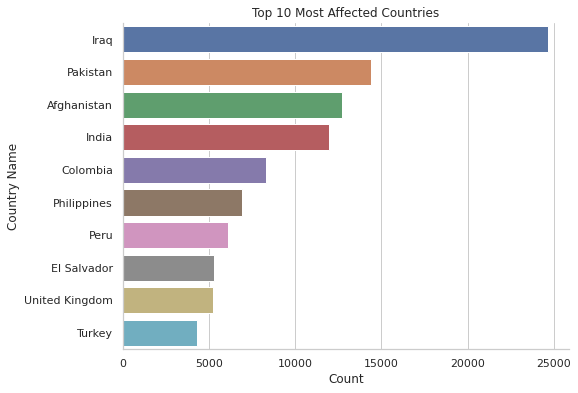

In [30]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8,6))
# sns.set_color_codes("muted")
sns.color_palette("pastel") # Set2 , ("husl", 9), ("flare", as_cmap=True)"pastel"
sns.barplot(x="Count", y="Country Name", data=country_wise[:10])
plt.title('Top 10 Most Affected Countries')
# plt.xlabel(' ')
# plt.ylabel('')
sns.despine()
plt.show()

The Above Barplot shows Top 10 affected countries in those Attack


It Seen IRAQ are most affected country

In [31]:
region_wise=df['region_txt'].value_counts().reset_index()
region_wise.rename(columns={"index":'Region Name','region_txt':'Count'},inplace=True)
region_wise

,Region Name,Count
0,Middle East & North Africa,50474
1,South Asia,44974
2,South America,18978
3,Sub-Saharan Africa,17550
4,Western Europe,16639
5,Southeast Asia,12485
6,Central America & Caribbean,10344
7,Eastern Europe,5144
8,North America,3456
9,East Asia,802


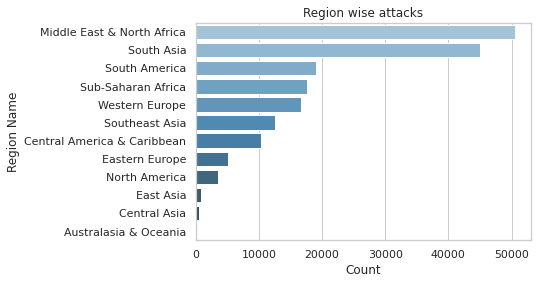

In [32]:
ax = sns.barplot(x="Count", y="Region Name", data=region_wise,
                 palette="Blues_d").set_title('Region wise attacks')

The Above Barplot shows Region wise Attack

 Middle East & North Africa Region are most affected region

In [33]:
city_wise=df['city'].value_counts().reset_index()
city_wise.rename(columns={"index":'City Name','city':'Count'},inplace=True)
city_wise

,City Name,Count
0,Unknown,9775
1,Baghdad,7589
2,Karachi,2652
3,Lima,2359
4,Mosul,2265
...,...,...
36669,Hotwag,1
36670,Ostend,1
36671,Balughata,1
36672,Jikoyi,1


In [34]:
df.city=="unknown"

0         False
1         False
2         False
3         False
4         False
          ...  
181686    False
181687    False
181688    False
181689    False
181690    False
Name: city, Length: 181691, dtype: bool

In [35]:
df[df.city=="unknown"]

,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,dbsource
1690,1973,0,0,1,45,Colombia,3,South America,Unknown,unknown,31.467463,43.246506,5.0,0,NaN,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),1,Business,9.0,Farm/Ranch,NaN,"Alirio Serrano Sanchez, rancher",45.0,Colombia,National Liberation Army of Colombia (ELN),0.0,0,-99.0,0.0,0.0,13,Unknown,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,PGIS
7537,1979,2,3,0,145,Nicaragua,2,Central America & Caribbean,Unknown,unknown,31.467463,43.246506,5.0,0,NaN,1,1,1,-9.0,0.0,1,0,6,Hostage Taking (Kidnapping),1,Business,9.0,Farm/Ranch,independent business,"Juan Bautista Espinales, farmer",145.0,Nicaragua,Unknown,0.0,0,-99.0,0.0,0.0,13,Unknown,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,PGIS
7668,1979,2,19,0,209,Turkey,10,Middle East & North Africa,Unknown,unknown,31.467463,43.246506,5.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,2,Government (General),15.0,Politician or Political Party Movement/Meeting...,NaN,Political Assoc,209.0,Turkey,Unknown,0.0,0,-99.0,0.0,0.0,6,Explosives,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,PGIS
7669,1979,2,19,0,209,Turkey,10,Middle East & North Africa,Unknown,unknown,31.467463,43.246506,5.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,2,Government (General),15.0,Politician or Political Party Movement/Meeting...,NaN,Political Association,209.0,Turkey,Unknown,0.0,0,-99.0,0.0,0.0,6,Explosives,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,PGIS
7671,1979,2,19,0,209,Turkey,10,Middle East & North Africa,Unknown,unknown,31.467463,43.246506,5.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,2,Government (General),15.0,Politician or Political Party Movement/Meeting...,NaN,Political Assoc,209.0,Turkey,Unknown,0.0,0,-99.0,0.0,0.0,6,Explosives,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,PGIS
7672,1979,2,19,0,209,Turkey,10,Middle East & North Africa,Unknown,unknown,31.467463,43.246506,5.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,2,Government (General),15.0,Politician or Political Party Movement/Meeting...,NaN,political assoc,209.0,Turkey,Unknown,0.0,0,-99.0,0.0,0.0,6,Explosives,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,PGIS
7673,1979,2,19,0,209,Turkey,10,Middle East & North Africa,Unknown,unknown,31.467463,43.246506,5.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,2,Government (General),15.0,Politician or Political Party Movement/Meeting...,NaN,Political Association,209.0,Turkey,Unknown,0.0,0,-99.0,0.0,0.0,6,Explosives,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,PGIS
7674,1979,2,19,0,209,Turkey,10,Middle East & North Africa,Unknown,unknown,31.467463,43.246506,5.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,2,Government (General),15.0,Politician or Political Party Movement/Meeting...,NaN,Political Assoc,209.0,Turkey,Unknown,0.0,0,-99.0,0.0,0.0,6,Explosives,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,PGIS
7675,1979,2,19,0,209,Turkey,10,Middle East & North Africa,Unknown,unknown,31.467463,43.246506,5.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,2,Government (General),15.0,Politician or Political Party Movement/Meeting...,NaN,political assoc,209.0,Turkey,Unknown,0.0,0,-99.0,0.0,0.0,6,Explosives,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,PGIS
7676,1979,2,19,0,209,Turkey,10,Middle East & North Africa,Unknown,unknown,31.467463,43.246506,5.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,2,Government (General),15.0,Politician or Political Party Movement/Meeting...,NaN,Political Assoc,209.0,Turkey,Unknown,0.0,0,-99.0,0.0,0.0,6,Explosives,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,PGIS


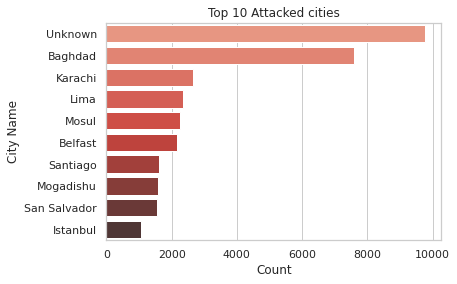

In [36]:
ax = sns.barplot(x="Count", y="City Name", data=city_wise[:10],
                 palette="Reds_d").set_title('Top 10 Attacked cities')

The Above Barplot shows Most number of Attack done in City wise

Baghdad are most affected Cities

In [37]:
attack_type =df['attacktype1_txt'].value_counts().reset_index()
attack_type.rename(columns={"index":"Attack type","attacktype1_txt" : "Count"},inplace = True)
attack_type

,Attack type,Count
0,Bombing/Explosion,88255
1,Armed Assault,42669
2,Assassination,19312
3,Hostage Taking (Kidnapping),11158
4,Facility/Infrastructure Attack,10356
5,Unknown,7276
6,Unarmed Assault,1015
7,Hostage Taking (Barricade Incident),991
8,Hijacking,659


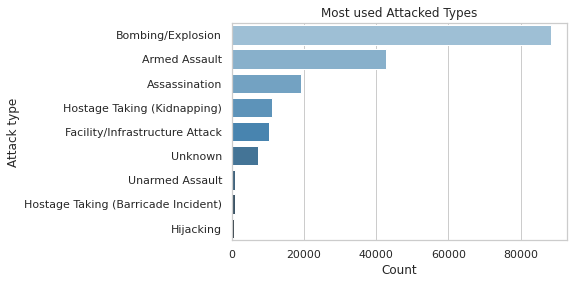

In [38]:
ax = sns.barplot(x="Count", y="Attack type", data=attack_type,
                 palette="Blues_d").set_title('Most used Attacked Types')

Above Plot shows the Top most Attacked types in this data

BOMBING/EXPLOSION this type of Attack done in Frequently

In [39]:
targeted_people = df["targtype1_txt"].value_counts().reset_index()
targeted_people.rename(columns={"index":"tareged_person","targtype1_txt": "Count"}, inplace= True)
targeted_people[:10]

,tareged_person,Count
0,Private Citizens & Property,43511
1,Military,27984
2,Police,24506
3,Government (General),21283
4,Business,20669
5,Transportation,6799
6,Utilities,6023
7,Unknown,5898
8,Religious Figures/Institutions,4440
9,Educational Institution,4322


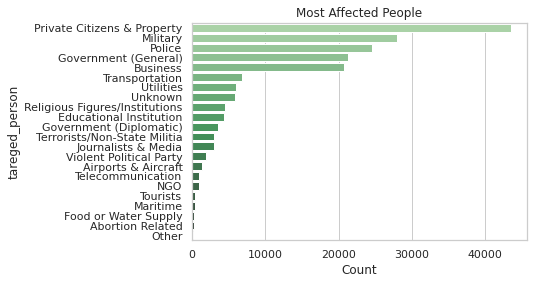

In [40]:
ax = sns.barplot(x="Count", y="tareged_person", data=targeted_people,
                 palette="Greens_d").set_title('Most Affected People')


Private Citizen and property are most affect in this attack

In [47]:
target_type1 = df["target1"].value_counts().reset_index()
target_type1.rename(columns={"index":"Target type","target1":"count"},inplace=True)
target_type1

,Target type,count
0,Civilians,6461
1,Unknown,5918
2,Soldiers,3157
3,Patrol,2942
4,Checkpoint,2905
...,...,...
86001,Manager Sanat Raj,1
86002,Military/ Police patrol,1
86003,Thor 67 Outpost,1
86004,Employee's Vehicle,1


In [59]:
ax = sns.barplot(x="Count", y="Target type", data=target_type1,
                 palette="Purples_d").set_title('Top Vulnerable groups by attacks')


AttributeError: ignored

Most Number of Civilian people are attacked 

In [51]:
nationality_type=df['natlty1_txt'].value_counts().reset_index()
nationality_type.rename(columns={"index":'Target Nationality','natlty1_txt':'Count'},inplace=True)
nationality_type

,Target Nationality,Count
0,Iraq,24113
1,Pakistan,13900
2,India,12098
3,Afghanistan,10931
4,Colombia,7922
...,...,...
210,People's Republic of the Congo,1
211,Saba (Netherlands Antilles),1
212,Tuvalu,1
213,Western Sahara,1


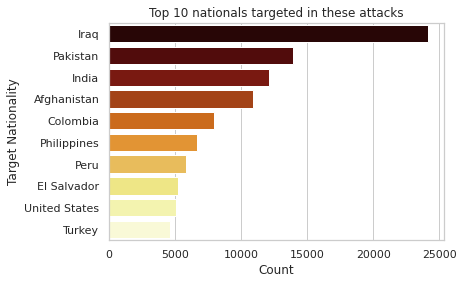

In [52]:
ax = sns.barplot(x="Count", y="Target Nationality", data=nationality_type[:10],
                 palette="afmhot").set_title('Top 10 nationals targeted in these attacks')

Iraq are most targeted in this Attack

In [53]:
gang_name=df['gname'].value_counts().reset_index()
gang_name.rename(columns={"index":'Gang','gname':'Count'},inplace=True)
gang_name

,Gang,Count
0,Unknown,82782
1,Taliban,7478
2,Islamic State of Iraq and the Levant (ISIL),5613
3,Shining Path (SL),4555
4,Farabundo Marti National Liberation Front (FMLN),3351
...,...,...
3532,Ansar Sarallah,1
3533,Sword of Islam,1
3534,Support of Ocalan-The Hawks of Thrace,1
3535,Arab Revolutionary Front,1


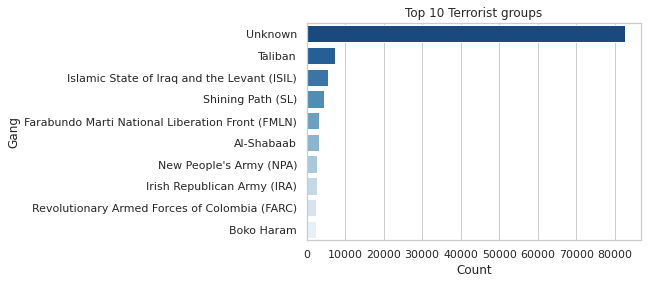

In [54]:
ax = sns.barplot(x="Count", y="Gang", data=gang_name[:10],
                 palette="Blues_r").set_title('Top 10 Terrorist groups')

In [55]:
weapon_name=df['weaptype1_txt'].value_counts().reset_index()
weapon_name.rename(columns={"index":'Weapons','weaptype1_txt':'Count'},inplace=True)
weapon_name

,Weapons,Count
0,Explosives,92426
1,Firearms,58524
2,Unknown,15157
3,Incendiary,11135
4,Melee,3655
5,Chemical,321
6,Sabotage Equipment,141
7,Vehicle (not to include vehicle-borne explosiv...,136
8,Other,114
9,Biological,35


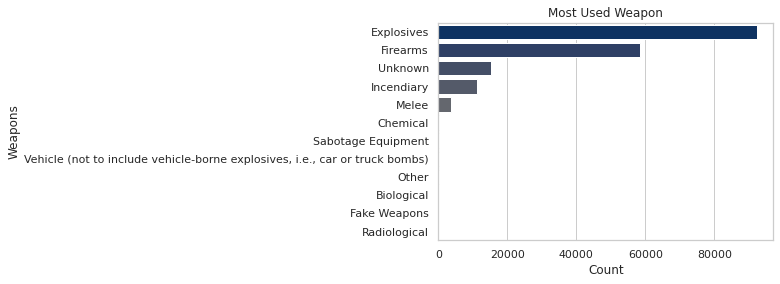

In [56]:
ax = sns.barplot(x="Count", y="Weapons", data=weapon_name,
                 palette="cividis").set_title('Most Used Weapon')